In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('Loan.csv')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         598 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [15]:
data.shape

(614, 13)

In [16]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           16
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
data.isnull().sum()/data.shape[0]*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.605863
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [19]:
data.duplicated().sum()

np.int64(0)

In [21]:
for i in data.select_dtypes (include="object").columns:
   print(data[i].value_counts())
   print("***"*10)

Loan_ID
LP002990    1
LP001002    1
LP001003    1
LP001005    1
LP001006    1
           ..
LP001024    1
LP001020    1
LP001018    1
LP001014    1
LP001013    1
Name: count, Length: 614, dtype: int64
******************************
Gender
Male      489
Female    112
Name: count, dtype: int64
******************************
Married
Yes    398
No     213
Name: count, dtype: int64
******************************
Dependents
0     345
1     102
2     101
3+     50
Name: count, dtype: int64
******************************
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
******************************
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
******************************
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
******************************
Loan_Status
Y    422
N    192
Name: count, dtype: int64
******************************


In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [23]:
data.describe(include="object")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,598,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002990,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


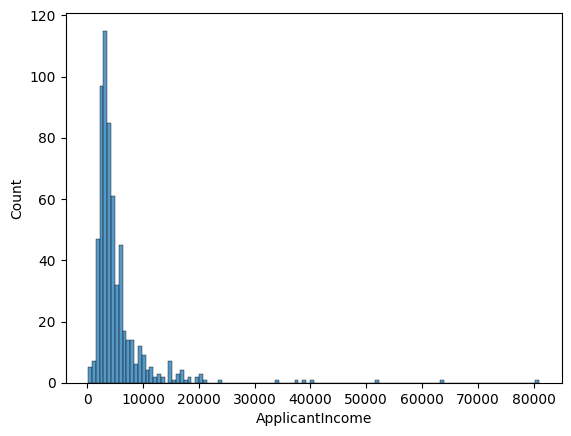

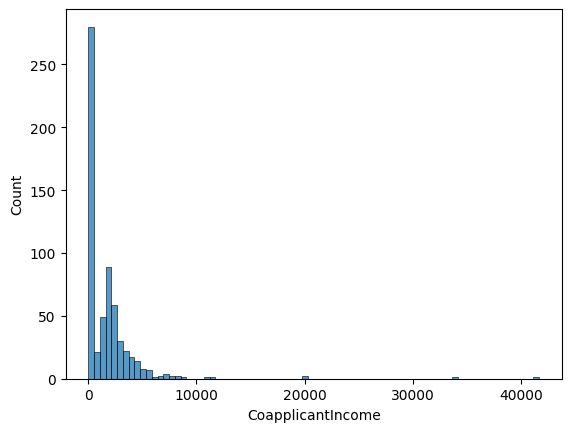

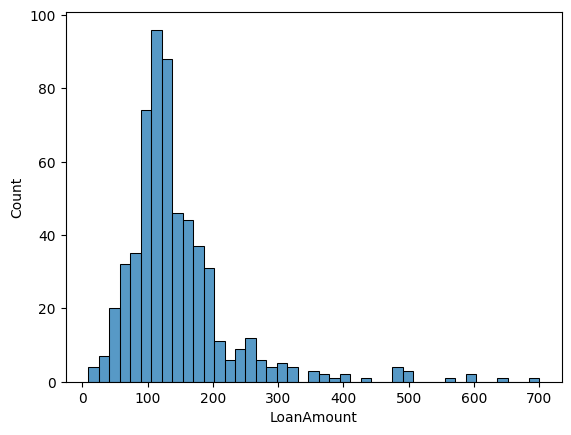

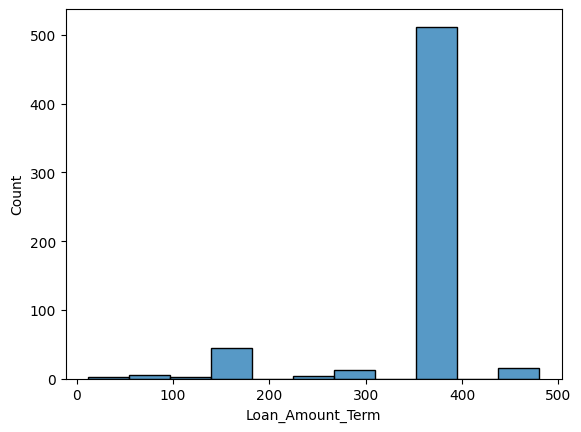

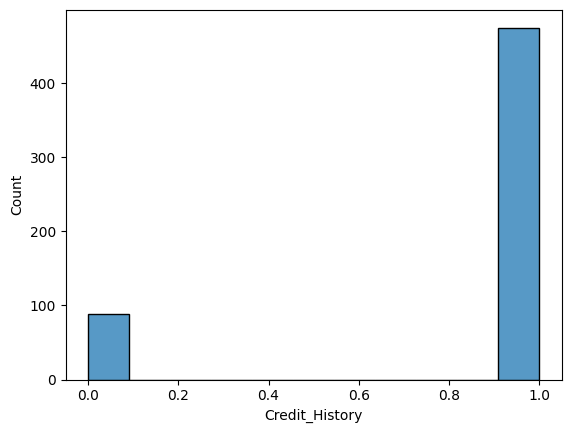

In [32]:
import warnings
warnings.filterwarnings("ignore")
for i in data.select_dtypes (include="number").columns:
    sns.histplot(data=data,x=i)
    plt.show()

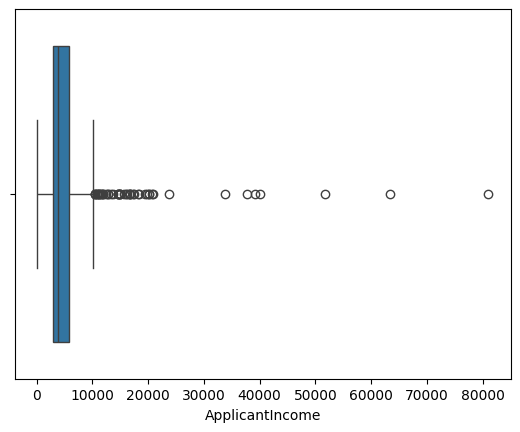

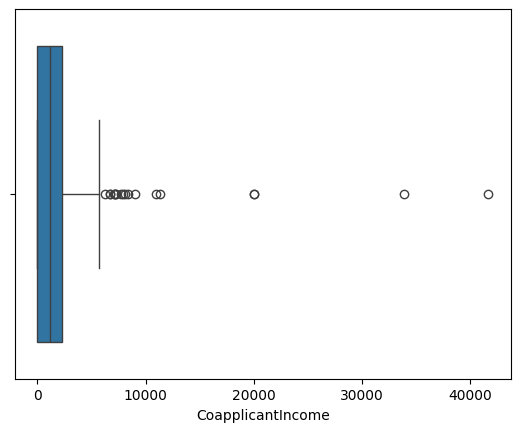

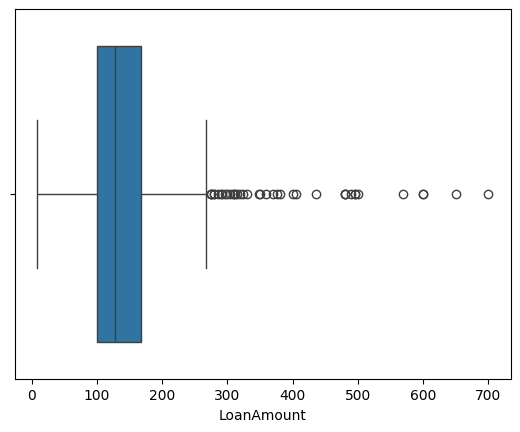

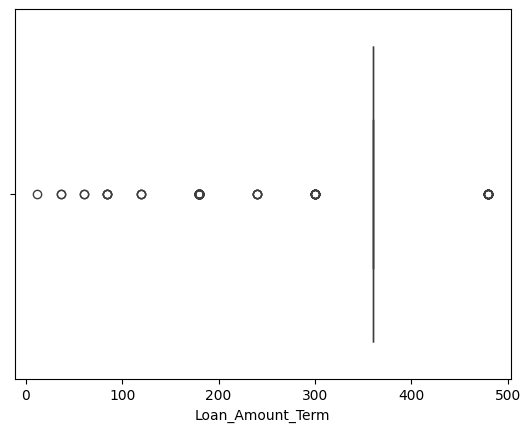

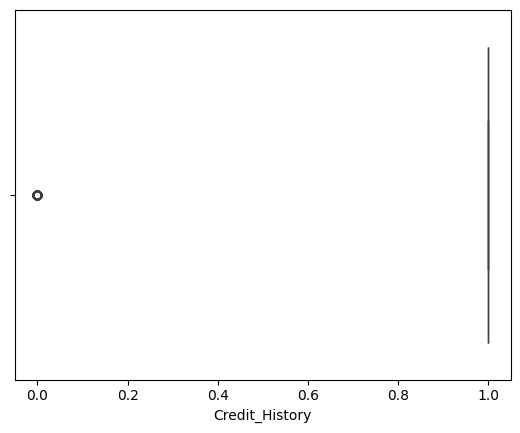

In [27]:
import warnings
warnings.filterwarnings("ignore")
for i in data.select_dtypes (include="number").columns:
    sns.boxplot(data=data,x=i)
    plt.show()

In [29]:
data.select_dtypes (include="number").columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [30]:
s=data.select_dtypes (include="number").corr()

<Axes: >

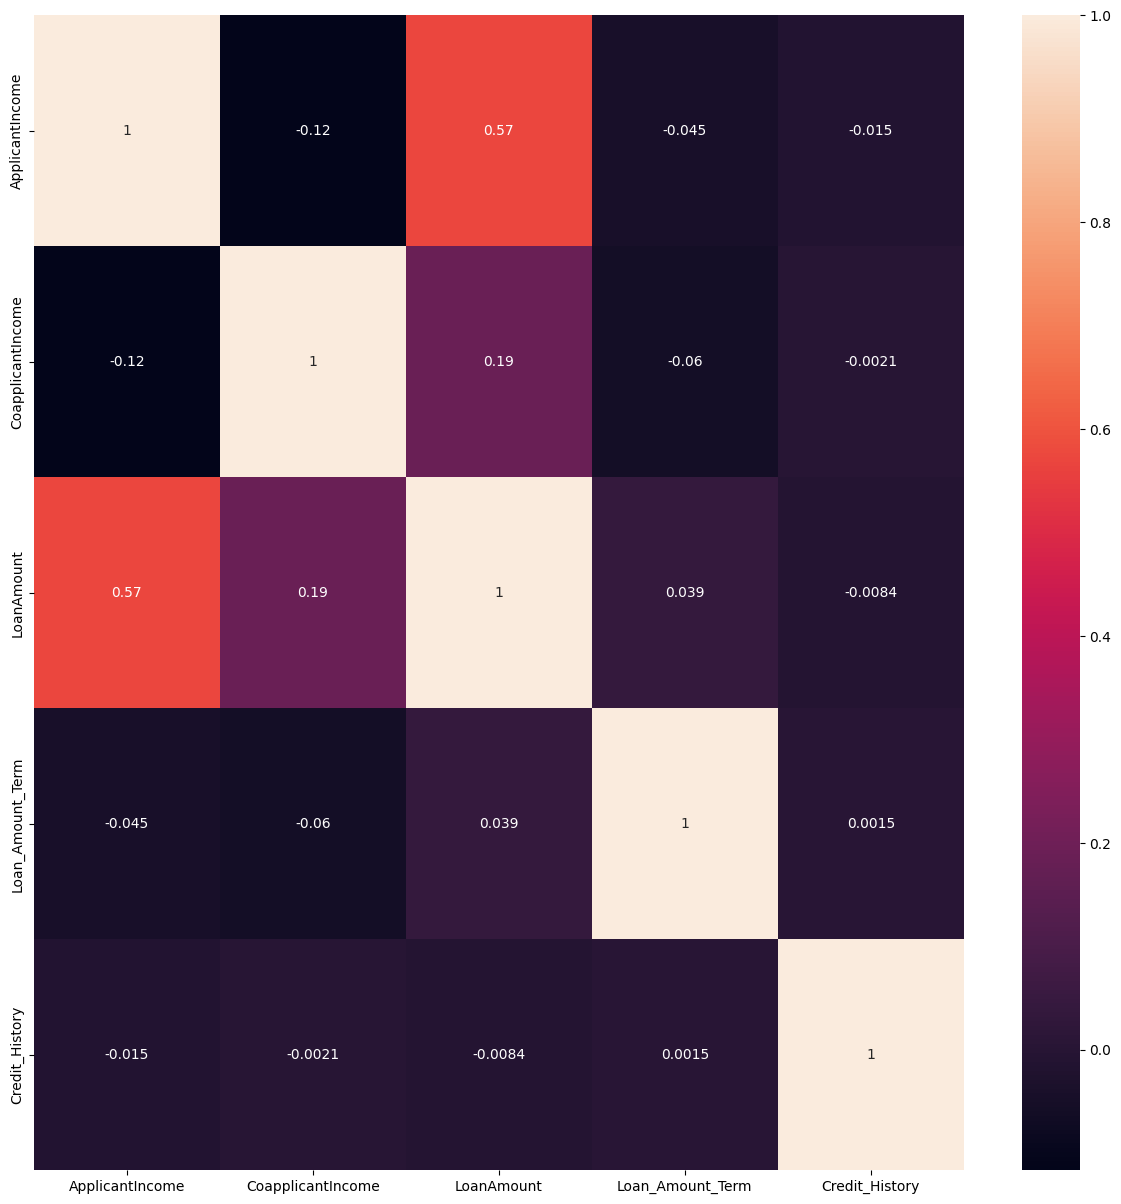

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(s, annot=True)

In [33]:
from sklearn.impute import KNNImputer
impute=KNNImputer()

In [37]:
for i in data. select_dtypes(include="number"). columns:
    data[i]=impute. fit_transform(data [ [i]])

In [45]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           16
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [47]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [48]:
data.drop_duplicates()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.000000,360.0,1.0,Urban,Y


In [49]:
dummy=pd.get_dummies(data=data,columns=["Gender", "Loan_Status"],drop_first=True)

In [50]:
dummy

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Male,Loan_Status_Y
0,LP001002,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,True,True
1,LP001003,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,True,False
2,LP001005,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,True,True
3,LP001006,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,True,True
4,LP001008,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,No,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Rural,False,True
610,LP002979,Yes,3+,Graduate,No,4106.0,0.0,40.000000,180.0,1.0,Rural,True,True
611,LP002983,Yes,1,Graduate,No,8072.0,240.0,253.000000,360.0,1.0,Urban,True,True
612,LP002984,Yes,2,Graduate,No,7583.0,0.0,187.000000,360.0,1.0,Urban,True,True
